#### Aykırı Gözlem: Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir. Ayrıca Aykırı değeri barındıran gözlem birimine de aykırı gözlem denir.

#### Aykırı Değer: Aykırılığı ifade eden nümerik değere aykırı değer denir.

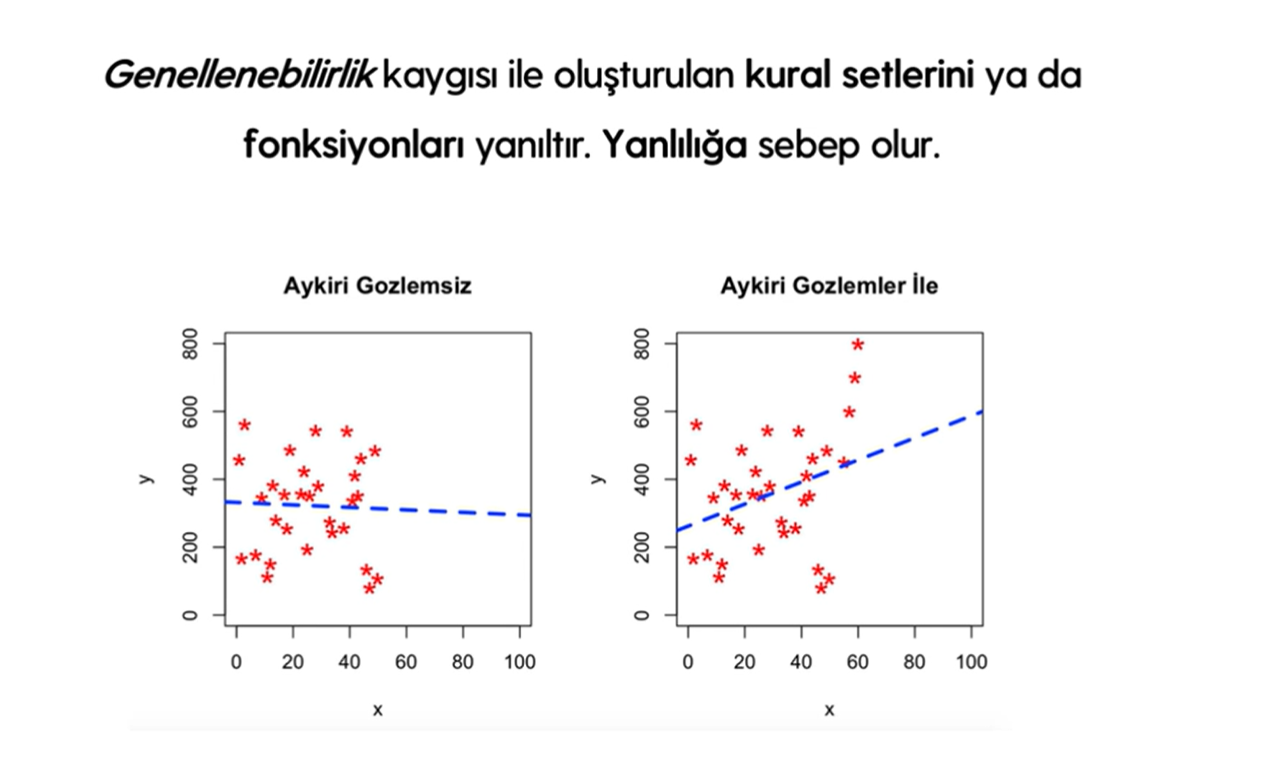

* Yukarıdaki görsellerin solunda bulunan grafikte x ekseni ve y ekseni incelendiğinde x ve y arasındaki ilişkiyi ifade eden mavi renkteki doğrunun eğimi negatif. Sağ taraftaki grafikte ise eğim pozitif yönlüdür. 

* Not: Aykırı gözlemde eğer kurulan modelin bir genelleme kaygısı varsa: zaten çok seyrek Olan senoryalar ve genele uymayan yapılar çalışmanın dışında bırakılmalıdır.

#### Standart Sapma Yaklaşımı: Bir değişkenin ortalamasının üzerine aynı değişkenin standart sapması hesaplanarak eklenir. 1,2 ya da 3 standart sapma değeri ortalama üzerine eklenerek ortaya çıkan bu değer eşik değer olarak düşünülür ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.

* Eşik Değer Hesaplama: Ortalama x Standart Sapma 

#### Z-Skoru Yaklaşımı: Standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılıma uyarlanır, yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan -+ 2,5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ya da altında olan değerler aykırı değer olarak işaretlenir. Aşağıda -+ 2,5 değer örneği;

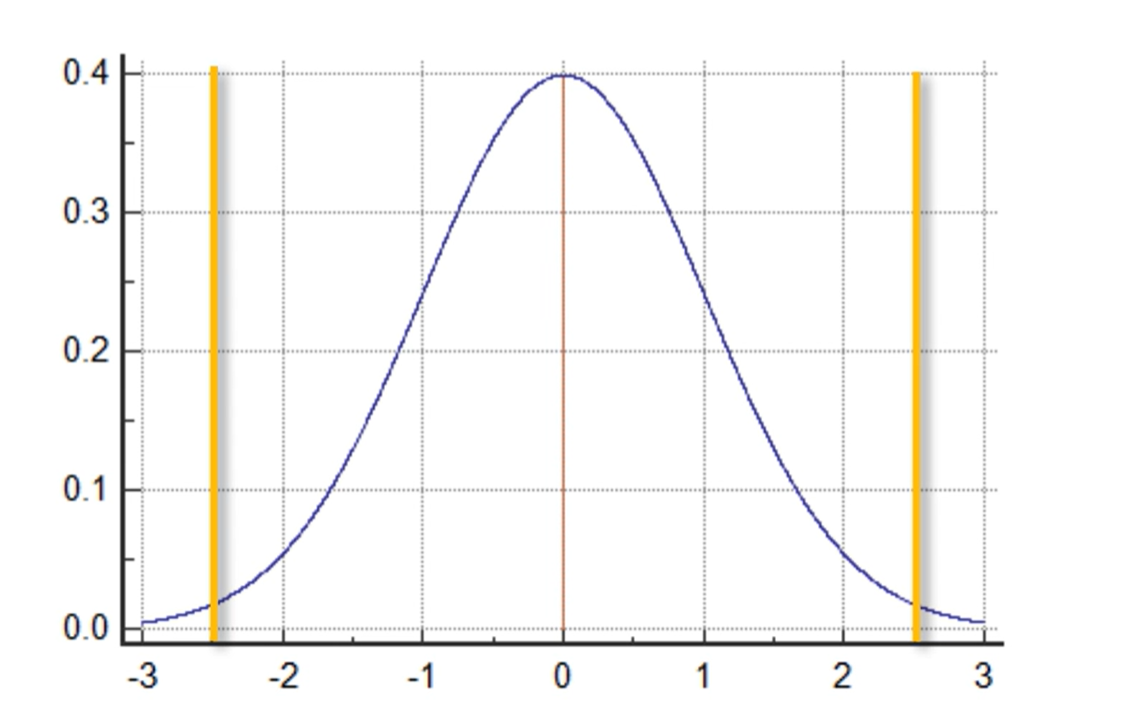

#### Boxplot(interquartile range - IQR) Yöntemi: En sık kullanılan yöntemlerden birisidir. Değişkenin değerleri küçükten büyüğe sıralanır. Çeyrekliklerine (yüzdekliklerine) yani Q1,Q3 değerlerine karşılık değeler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

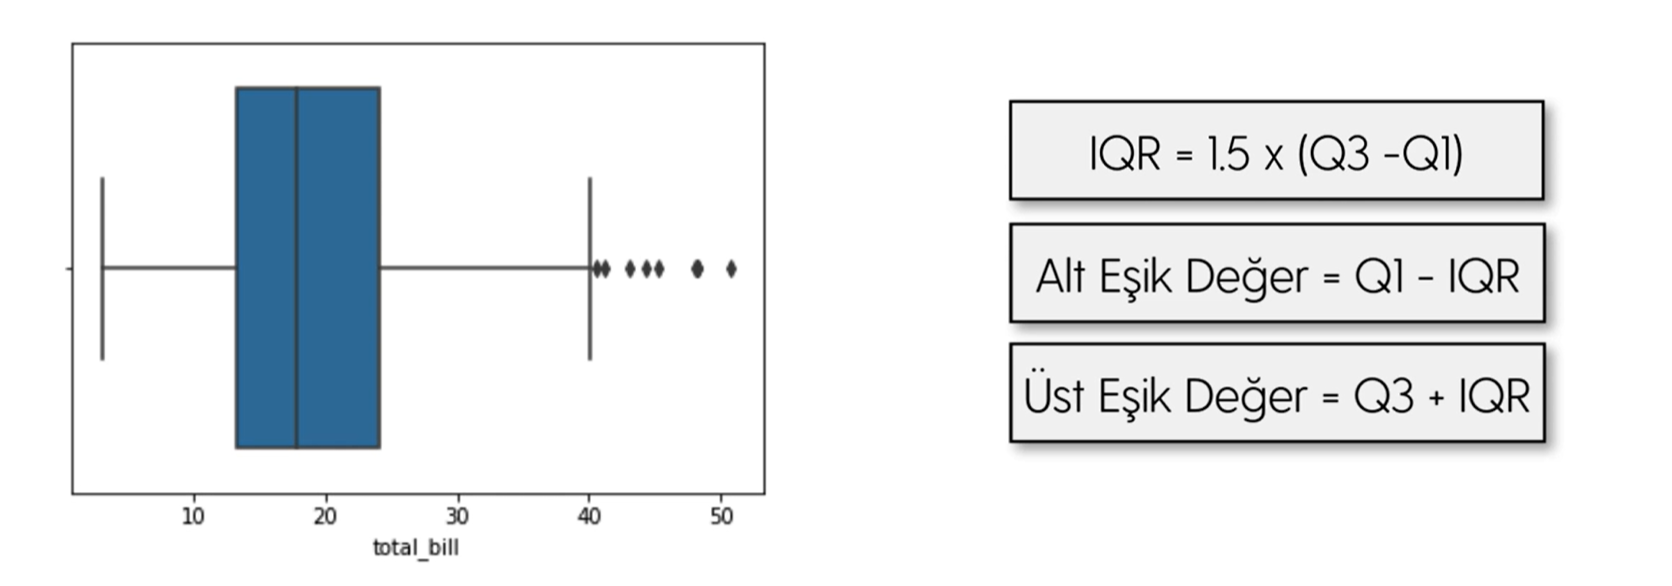

# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("diamonds")    # seaborn kütüphanemiz içerisinden verimizi çekiyoruz.
df = df.select_dtypes(include = ["float64", "int64"])   # Sadece içerisindeki sayısal değişkenlere erişmek için tip seçimi gerçekleştiriyoruz.
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

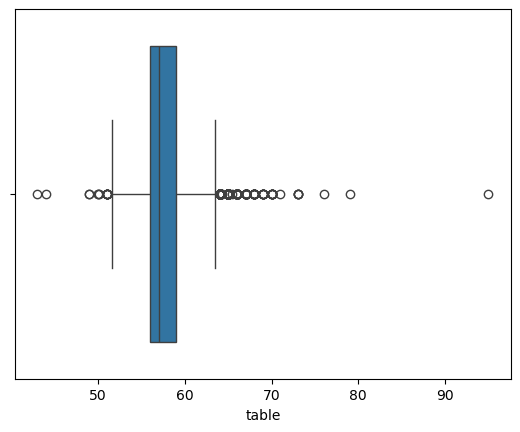

In [4]:
sns.boxplot(x = df_table);

* Bu kutu grafiğinde gözlemlediğimiz değerler aykırı gözlem olarak değerlendirilecektir. Aşağıda boxplot yardımıyla eşik değeri belirleyelim.

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

# IQR = Interquartile Range (Çeyrekler Arası Aralık) demektir ve dilimler arasındaki farkı hesaplar.

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [9]:
alt_sinir = Q1 - 1.5 * IQR
# Bunun anlamı 1. çeyrek değerimizle 1,5 katı kadar IQR kadar aşağısını sınır olarak belirle.

In [10]:
ust_sinir = Q3 + 1.5 * IQR
# Burada ise üst sınır olarak belirle

In [11]:
alt_sinir

51.5

In [12]:
ust_sinir

63.5

* Yukarıda sınırları belirleme işlemimiz elle yapılmıştır. Bu değerler zaten boxplot ile görselleştirilirken gözlemlenebilmektedir. Bizim daha net anlayabilmemiz için koymuş bulunmaktayım.

In [13]:
(df_table < alt_sinir) | (df_table > ust_sinir) 

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [14]:
aykiri_tf = (df_table < alt_sinir)

# Burada tf = true false kısaltması

In [15]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [16]:
df_table[aykiri_tf]

# Tablomuzdaki aykırı değerlerin hepsine ulaştık

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [17]:
df_table[aykiri_tf].index

# Aykırı değerlerin sadece indexlerine ulaştık.

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

## Aykırı Değer Problemini Çözmek

#### Silme Yöntemi

In [18]:
type(df_table)

pandas.core.series.Series

In [19]:
# df_table'mizi DataFrame formatına çevirelim

df_table = pd.DataFrame(df_table)
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [20]:
df_table.shape

(53940, 1)

* Hem alt hem de üst sınırı göz önünde bulundurarak df içerisinde bulunan aykırı olmayan değerlere erişmeye çalışalım

* "~" koyma nedenimiz koşulu sağlamayanları al demek.

In [21]:
temiz_df = df_table[~((df_table < (alt_sinir)) | ((df_table > ust_sinir))).any(axis = 1)]

* any(axis = 1) işlemi sütun bazında yapmak istediğimiz işlemi temsil etmektedir.

In [22]:
temiz_df.shape

(53335, 1)

#### Ortalama ile Doldurma Yöntemi

In [23]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [24]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [25]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [26]:
df_table[aykiri_tf]   # Aykırı değerleri yakaladık. Burada kullanılan aykiri_tf alt_sinir'a bağlı aykırı değerler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [27]:
df_table.mean()

57.45718390804598

In [28]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19004\3741757661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [29]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

* Yukarıda görüldüğü gibi aykırı değerlerin hepsi aynı ortalama ile doldurulmuş oldu.

#### Baskılama Yöntemi

* Baskılama yönteminde aykırı değerler yakalandıktan sonra üst taraftaysa üst sınır değerine eşitlenir, alt taraftaysa alt sınır değerine eşitlenir. 

In [30]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [31]:
df_table = df["table"]

In [32]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [33]:
alt_sinir

51.5

In [34]:
# alt sınır değerlerinin altında kalan değerleri baskılama

df_table[aykiri_tf] = alt_sinir

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19004\1715057034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [35]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

* Yukarıda da görüleceği gibi aykırı değerlerimizi alt sınırdaki eşik değerimiz ile aynı şekilde doldurarak baskılamış olduk.

## Çok Değişkenli Aykırı Gözlem Analizi

#### Local Outlier Factor

* Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

* Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek 
bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi  yoğun değilse demek ki bu değer aykırı değerdir şeklinde 
değerlendiriliyor.

In [36]:
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include = ["float64", "int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [37]:
from sklearn.neighbors import LocalOutlierFactor

In [38]:
# LOF kullanarak skorlama işlemi gerçekleştirme

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

# contamination = Yoğunluğu ifade etmektedir.

In [39]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

* Yukarıda herbir gözlem birimi için elde edilmiş skorlar mevcut

In [40]:
df_scores = clf.negative_outlier_factor_

In [41]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [42]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [43]:
np.sort(df_scores)[13]   # Burda 13. değeri referans alıyoruz. Diğer işlemleri buna göre yapacağız. (Bunu kendim seçtim)

-3.823787967755565

In [44]:
esikDeger = np.sort(df_scores)[13]

In [45]:
aykiri_tf = df_scores > esikDeger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

* Yukarıda aykırı değerleri eşik değerden yukarı olacak şekilde kaydet koşulu koyduk.

#### Silme

In [46]:
yeni_df = df[df_scores > esikDeger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


* Şu anda yukarıda yeni_df içerisinde gözlemlediğimiz tüm değerler aykırı olmayan değerlerdir.
* Eğer aykırı değerleri gözlemlemek istersek aşağıdaki gibi yapmamız gerekmektedir;

In [47]:
df[df_scores < esikDeger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


#### Baskılama

In [48]:
df[df_scores == esikDeger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


* Eşik değerin belirlenen skora karşılık gelen nümerik gözlem birimi yukarıdaki gibidir.
* Şimdi aşağıda ise biz bu aykırı değerler yerine eşik değerleri atayarak baskılama işlemi gerçekleştirebiliriz.

In [49]:
baskiDegeri = df[df_scores == esikDeger]

In [50]:
aykirilar = df[~aykiri_tf]

In [51]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [52]:
aykirilar.to_records(index = False)  

# Bu işlem baştan bir index oluşturma işlemidir. Yani sadece df içerisindeki indexleri yazdırdı. Yukarıda da aykirilar df'i gösterilmiştir.

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [53]:
res = aykirilar.to_records(index = False) # Burda da bir değişkene atadık

In [54]:
res[:] = baskiDegeri.to_records(index = False)  
# Yukarıda oluşturulan tüm reslerin yerine baskı değeri yerleştirecek

In [55]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

* Yukarıda bütün aykırı değerlerin yerine eşik değerlerimiz yani baskılayacak olduğumuz değerimizin değerlerini, tüm değişkenlerdeki değerlerini doldurmuş olduk.

In [56]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [57]:
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [58]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


# Eksik Gözlem Analizi

* Eksik Veri: İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade 
etmektedir
* Tümüyle Raslantısal Kayıp: Diğer değişkenlerden ya da yapısal bir 
problemden kaynaklanmayan tamamen rastgele oluşan gözlemler
* Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.
* Raslantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal 
problemler ile ortaya çıkan eksiklik tür...

In [59]:
V1 = np.array([1, 3, 6, np.NAN, 7, 1, np.NAN, 9, 15])
V2 = np.array([7, np.NAN, 5, 8, 12, np.NAN, np.NAN, 2,3])
V3 = np.array([np.NAN, 12, 5, 6, 14, 7, np.NAN, 2, 31])

df = pd.DataFrame(
    {"V1": V1,
     "V2": V2,
     "V3": V3}
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [60]:
df.isnull().sum()  # Verideki eksik değerleri getirmeye yaradı.

V1    2
V2    3
V3    2
dtype: int64

In [61]:
df.notnull().sum()  # Boş olmayanları getirmeye yarıyor.

V1    7
V2    6
V3    7
dtype: int64

In [62]:
df.isnull().sum().sum()  # Eksik değerlerin toplam adedini getirmeye yarıyor.

7

In [63]:
df.isnull()  # Eksiklik var mı yok mu = True-False döndürüyor

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [64]:
df[df.isnull().any(axis = 1)]  # En az bir tane eksik değer varsa seç demek

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [65]:
df[df.notnull().all(axis = 1)] # Sütunlara(değişkenlere) göre tüm dolu olan değerleri getir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [66]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notna()]   # all yerine böyle tek tekte yazabiliriz.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [67]:
# Eksik değerlerin direkt silinmesi

df.dropna(inplace = True)  # "inplace = True" argümanı yapılan işlemi kalıcı hâle getirmektedir.

In [68]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [69]:
# Basit DEğer Atama

df["V1"]

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [70]:
df["V1"].mean()

9.25

In [71]:
df["V1"].fillna(df["V1"].mean())    # Kendi ortalaması ile eksik değerleri doldurma

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [72]:
df["V2"].fillna(0)    # V2'deki null değerleri 0 ile doldurmuş olduk.

2     5.0
4    12.0
7     2.0
8     3.0
Name: V2, dtype: float64

* Elimizde diyelim ki 10 tane değişken var ve hepsi için ortalama atama işlemini gerçekleştirmek istiyoruz. Bunları tek tek elle yapamayacağımız için fonksiyonel programlama aşaması olan "lambda ve apply" fonksiyonlarını kullanrak yapabiliriz. Örneğin aşağıda yaptığımız işlem; Öncelikle x'e bağlı bir fonksiyon yazıyoruz(lambda x:). Daha sonra her bir değişkeni yakaladığında bunları doldur(x.fillna()). Son olarak dolduracağı şekil, o değişkenlerin ortalaması ile doldur(x.mean(), axis = 0) satırlara göre.

In [73]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Eksik Veri Yapısının Görselleştirilmesi

In [74]:
!pip install missingno

In [75]:
import missingno as msno

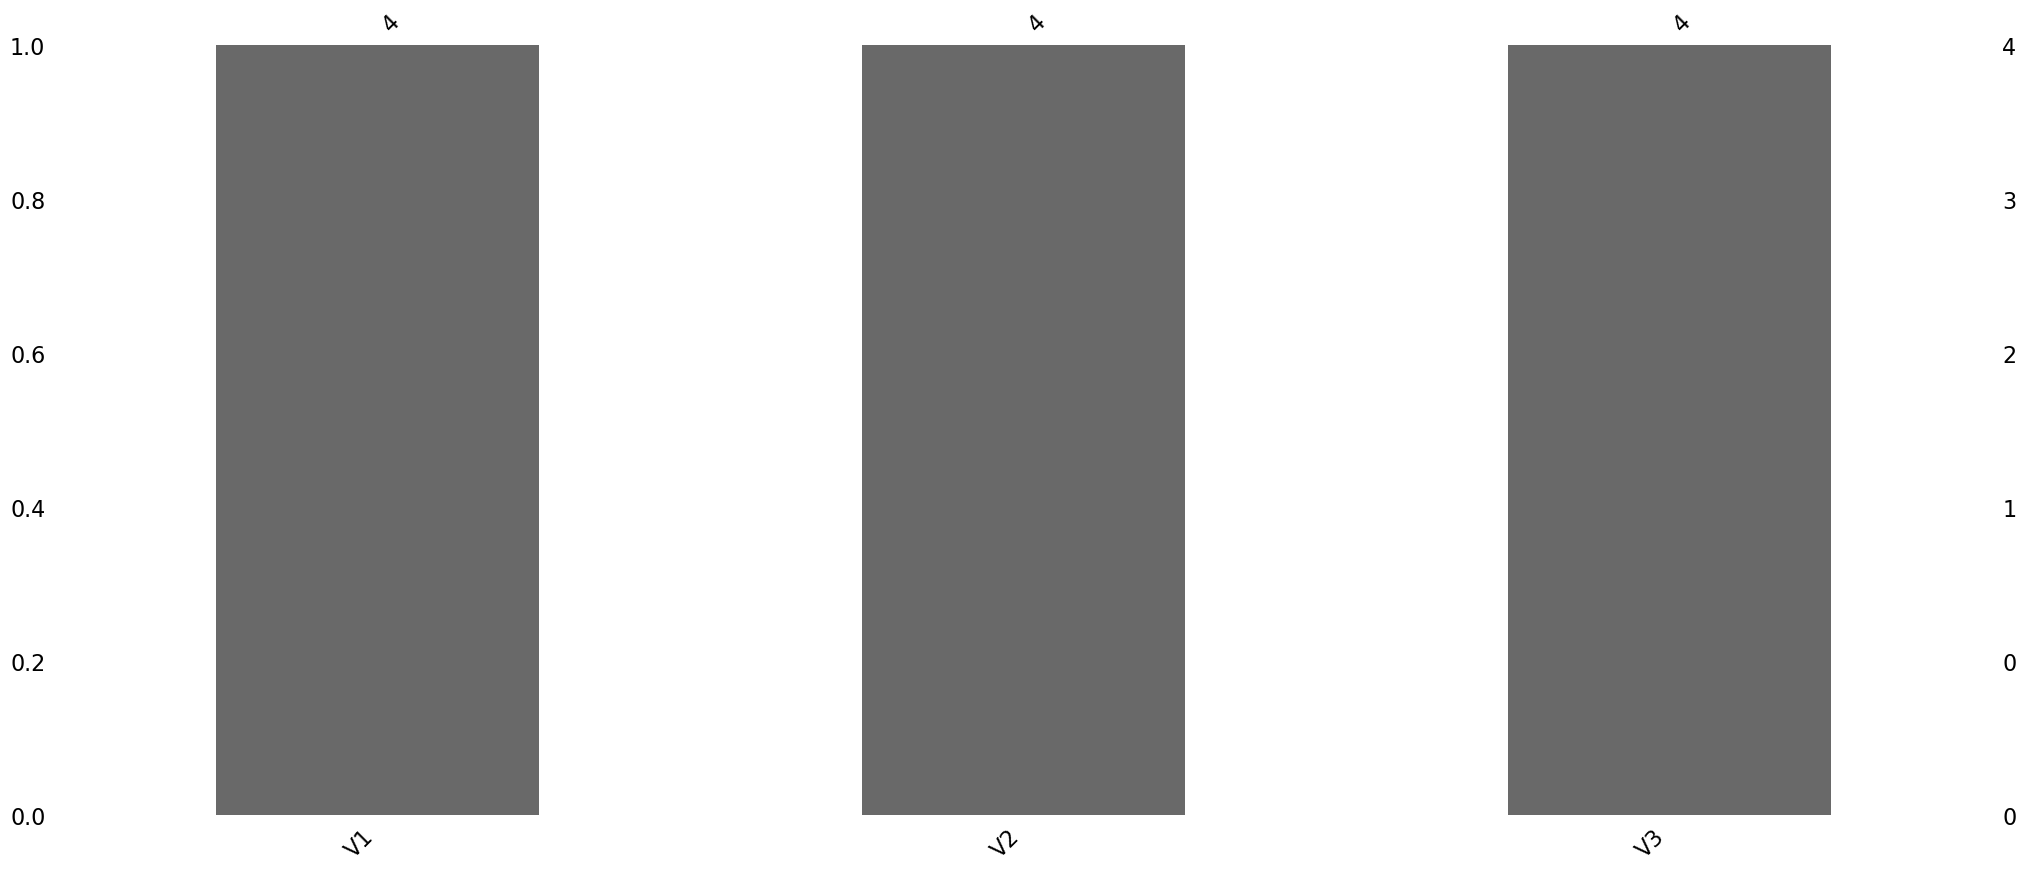

In [76]:
msno.bar(df);

* "missingno" kütüphanesi yardımıyla yukarıdaki verimizde eksik değerleri oransal olarak yukarıdaki grafikte görselleştirmiş bulunmaktayız.

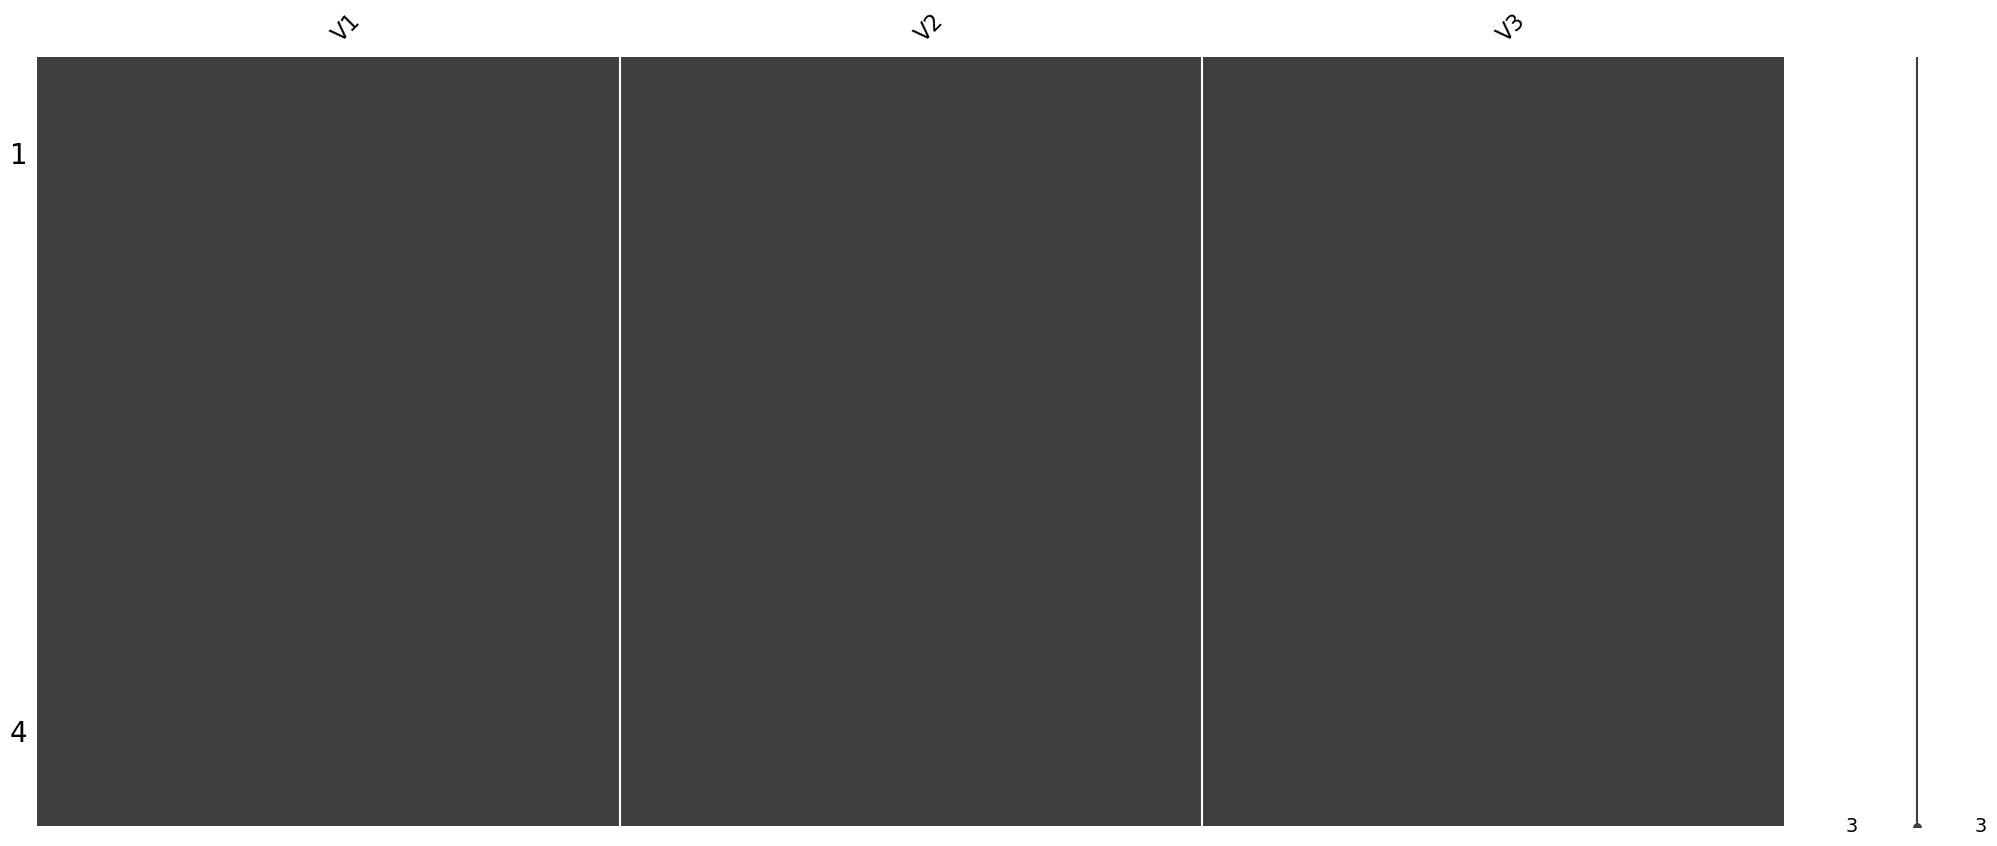

In [77]:
msno.matrix(df);

* Yukarıda ise bize eksik değer olan yerleri beyaz olacak şekilde bıraktı. Soldaki değerler bize gözlemlerimiz söylemekte. Burada basit bir veri üzerinden incelemiş bulunmaktayız. Şimdi aşağıda daha büyük bir veri seti üzerinde bu işlemi gerçekleştirmeye çalışalım.

In [78]:
data = sns.load_dataset("planets")
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [79]:
data.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

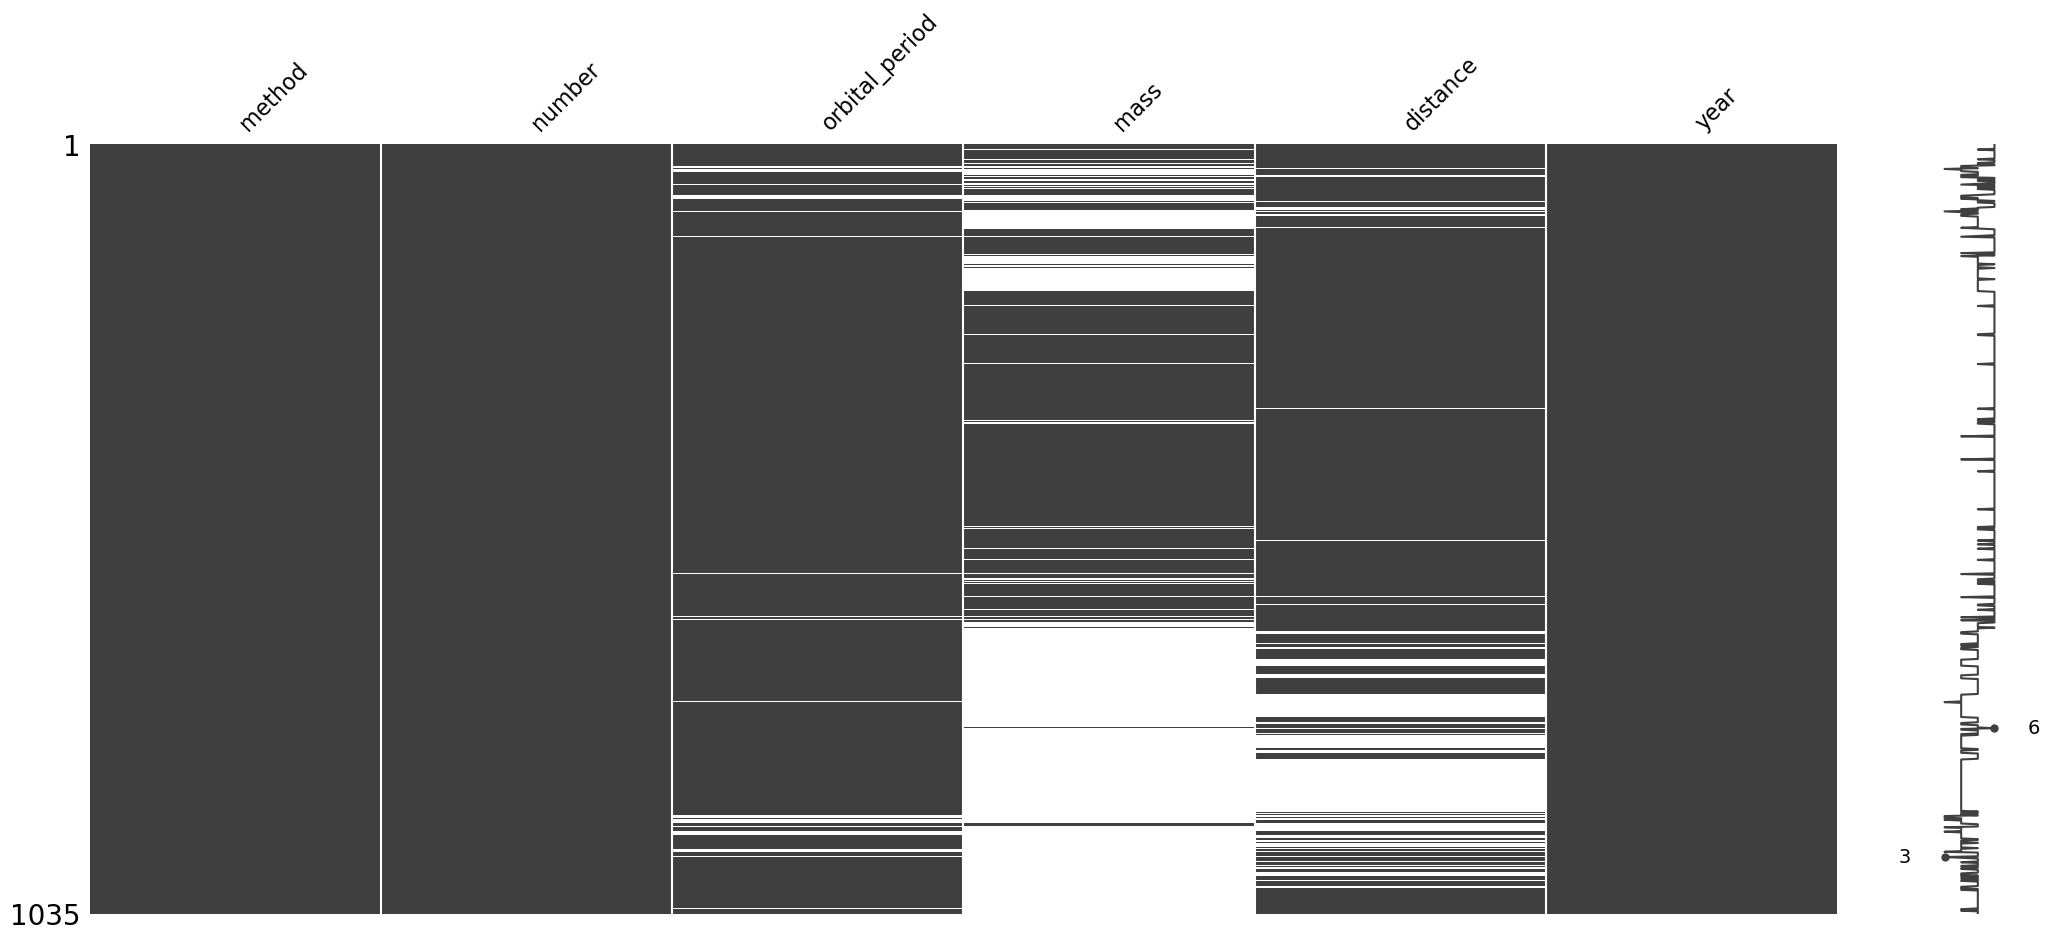

In [80]:
msno.matrix(data);

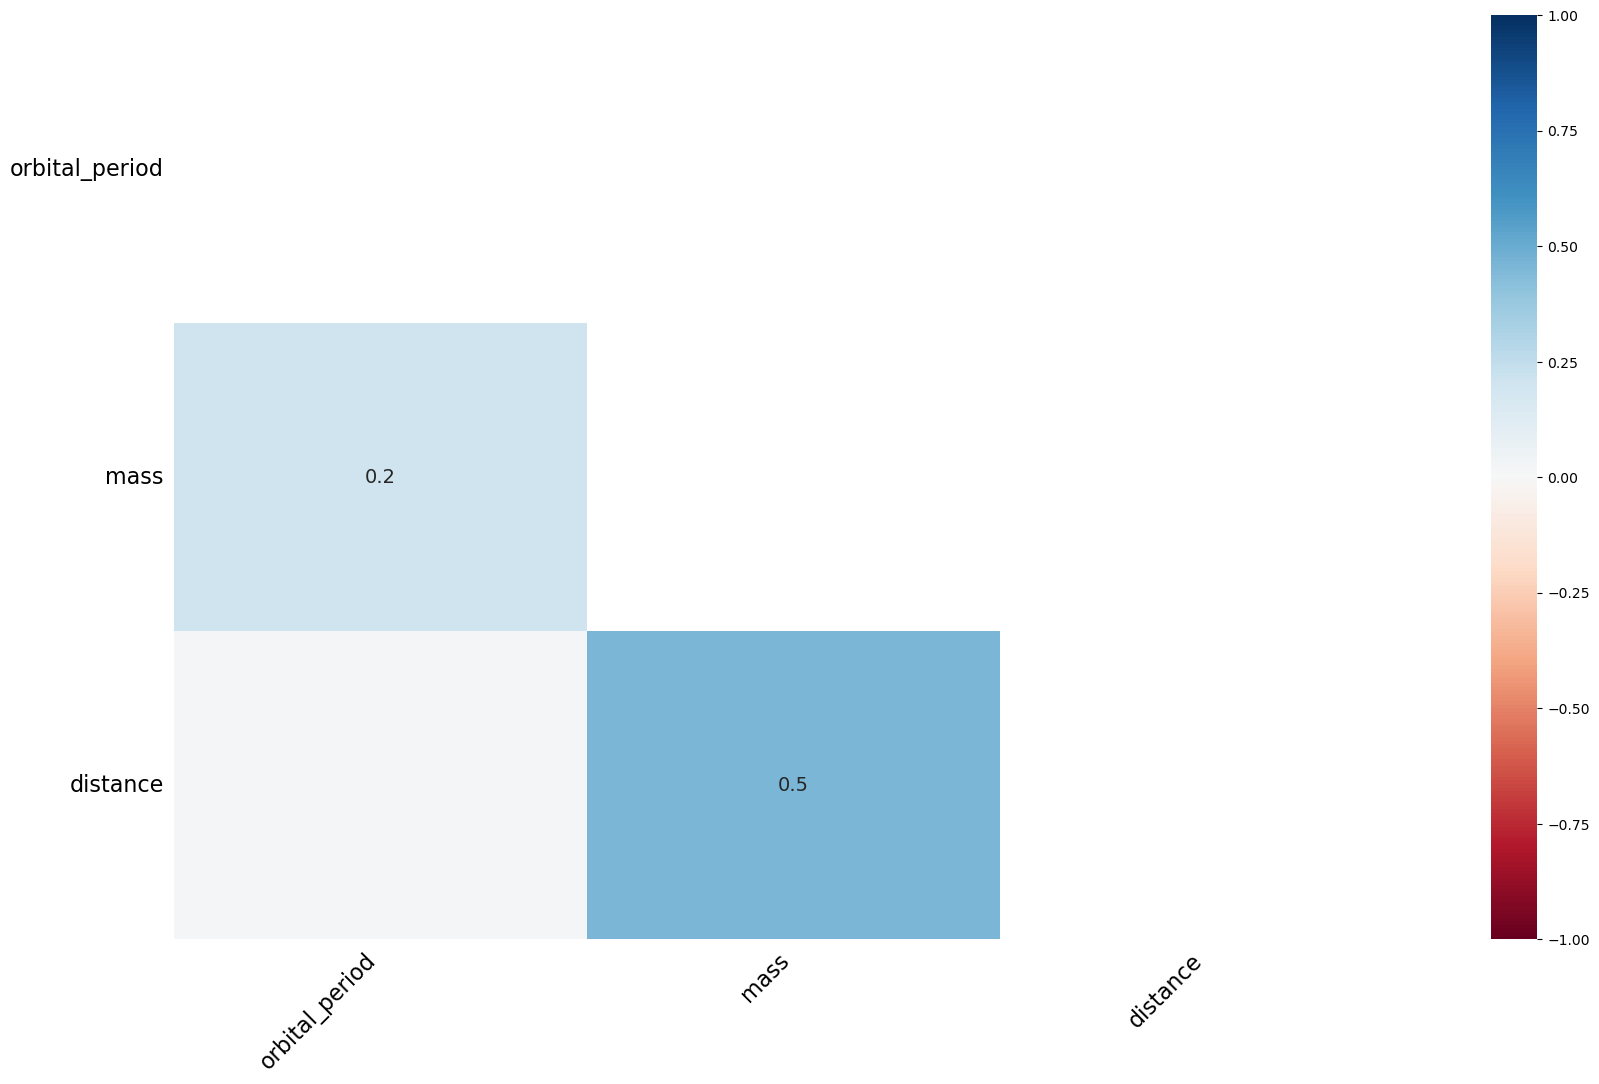

In [81]:
msno.heatmap(data);

#### Silme Yöntemleri

In [82]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [83]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [84]:
df.dropna(how = "all")  # How argümanı nasıl silmemiz gerekiyor diye sormakta biz ise hepsi null değerse diye belirtmiş olduk.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


* Yukarıda dikkat edileceği üzere 6. satır komple silinmiş oldu. Çünkü 6. gözlem null değerlerden oluşmaktadır.

In [85]:
# değişken bazında en az bir adet null değere denk gelirsen sil

df.dropna(axis = 1)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


* Yukarıda boş dönme nedeni her bir değişkenden en az bir adet boş değerden oluşmasıdır. Bu nedenle kuralımıza göre sildiği için boş değer kalmıştır.

In [86]:
df["sil_beni"] = np.nan
df

,V1,V2,V3,sil_beni
2,6.0,5.0,5.0,NaN
4,7.0,12.0,14.0,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [87]:
# Tüm değerleri nan olan kısmı silmek için kullanılacak kod;

df.dropna(axis = 1, how = "all")

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [88]:
df

,V1,V2,V3,sil_beni
2,6.0,5.0,5.0,NaN
4,7.0,12.0,14.0,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [89]:
# Burada kalıcı olarak silmemiş bulunmaktayız. Bunu kalıcı halde silmek için;

df.dropna(axis = 1, how = "all", inplace = True)
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Değer Atama Yöntemleri

In [90]:
V1 = np.array([1, 3, 6, np.NAN, 7, 1, np.NAN, 9, 15])
V2 = np.array([7, np.NAN, 5, 8, 12, np.NAN, np.NAN, 2,3])
V3 = np.array([np.NAN, 12, 5, 6, 14, 7, np.NAN, 2, 31])

df = pd.DataFrame(
    {"V1": V1,
     "V2": V2,
     "V3": V3}
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [91]:
# Sayısal değişkenlerde atama

df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [92]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [93]:
# Tüm değişkenler için kendi ortalamaları ile doldurma

df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [94]:
# İkinci yol: Aşağıdaki kodda yukarıdaki lambdalı kod gibi aynı sonucu vermektedir.

df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [95]:
# Bazı değerleri medyan bazı değerleri ortalama ile doldurmak istersek;

df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [96]:
df["V3"].fillna(df.median())

0     NaN
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     NaN
7     2.0
8    31.0
Name: V3, dtype: float64

In [97]:
# Üçüncü Yol;

df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


#### Kategorik Değişken Kırılımında Değer Atama

In [98]:
V1 = np.array([1, 3, 6, np.NAN, 7, 1, np.NAN, 9, 15])
V2 = np.array([7, np.NAN, 5, 8, 12, np.NAN, np.NAN, 2,3])
V3 = np.array([np.NAN, 12, 5, 6, 14, 7, np.NAN, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame(
    {"maas": V1,
     "V2": V2,
     "V3": V3,
     "departman": V4}
)
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [99]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [100]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

#### Kategorik Değişkenlerde Değer Atama

In [101]:
V1 = np.array([1, 3, 6, np.NAN, 7, 1, np.NAN, 9, 15])
V4 = np.array(["IT", np.NAN, "IK", "IK", "IK", "IK", "IK", "IT", "IT"], dtype = object)

df = pd.DataFrame(
    {"maas": V1,
     "departman": V4}
)
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [102]:
df["departman"].mode()

0    IK
Name: departman, dtype: object

In [103]:
df["departman"].mode()[0]

'IK'

In [104]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [105]:
# Mod yerine önceki veya sonraki değerle doldurmak istersek;

df["departman"].fillna(method = "bfill")  # sonraki değerle doldurma işlemi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19004\2193089583.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["departman"].fillna(method = "bfill")  # sonraki değerle doldurma işlemi


0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [106]:
df["departman"].fillna(method = "ffill")  # önceki değerle doldurma

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19004\2863098840.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["departman"].fillna(method = "ffill")  # önceki değerle doldurma


0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

#### Tahmine Dayalı Değer Atama Yöntemleri

In [107]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64", "int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [108]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [109]:
# KNN ile eksik değerleri doldurma

In [110]:
!pip install ycimpute

In [111]:
from ycimpute.imputer import knnimput

In [112]:
variableNames = list(df)

In [113]:
n_df = np.array(df)

In [114]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [115]:
n_df.shape

(891, 6)

In [116]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.065
Imputing row 101/891 with 0 missing, elapsed time: 0.078
Imputing row 201/891 with 0 missing, elapsed time: 0.078
Imputing row 301/891 with 1 missing, elapsed time: 0.078
Imputing row 401/891 with 0 missing, elapsed time: 0.078
Imputing row 501/891 with 0 missing, elapsed time: 0.080
Imputing row 601/891 with 0 missing, elapsed time: 0.080
Imputing row 701/891 with 0 missing, elapsed time: 0.080
Imputing row 801/891 with 0 missing, elapsed time: 0.080


In [117]:
type(dff)

numpy.ndarray

In [118]:
dff = pd.DataFrame(dff, columns = variableNames)

In [119]:
type(dff)

pandas.core.frame.DataFrame

In [120]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [121]:
# EM algoritması ile eksik değerleri doldurma

In [122]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64", "int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [123]:
from ycimpute.imputer import EM

In [124]:
variableNames = list(df)

In [125]:
n_df = np.array(df)

In [126]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [127]:
dff = EM().complete(n_df)

In [128]:
dff = pd.DataFrame(dff, columns = variableNames)

In [129]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# Değişken Dönüşümleri

#### Değişken Standardizasyonu


* Standartlaştırma işlemi: Veri setinin taşımış olduğu bilginin özütünü bozmadan belirli bir standarta getirir. Ama bilgiyi değiştirir.
* Dönüştürme işlemi ise veri setinin taşımış olduğu bilgiyi bazen bozar bazen temsil şeklinde değiştirir.
* Değişken Dönüşümleri > Standarizasyon

In [130]:
V1 = np.array([1, 3, 6, 5, 7])
V2 = np.array([7, 7, 5, 8, 12])
V3 = np.array([6, 12, 5, 6, 14])
df = pd.DataFrame({"V1": V1,
                   "V2": V2,
                   "V3": V3})
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [131]:
# Standardizasyon 

In [132]:
from sklearn import preprocessing

preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [133]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

In [134]:
# Normalizasyon: Değerleri 0 ile 1 arasında dönüştürme işlemi için kullanılır.

In [135]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [136]:
# Min - Max Dönüşümü: İstemiş olduğumuz iki tane aralığın arasında dönüştürme işleminde kullanılır.

In [137]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [138]:
scaler.fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

#### Değişken Dönüşümleri

In [139]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### 0-1 Dönüşümü: 
* Örneğin cinsiyet değişkenini 1 ve 0 değerlerine dönüştürmek demek. Ve buna LabelEncoder denmektedir.

In [140]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [141]:
labelEncoder.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [142]:
df["new_sex"] = labelEncoder.fit_transform(df["sex"])

In [143]:
df   # Female 0 oldu Male 1 oldu

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


##### 1 ve Diğerleri(0) Dönüşümü:
* Burda ise 2'den fazla sınıf olduğu zamanlarda kullanılmaktadır. Burda seçtiğimiz sınıf 1 diğerleri 0 olacak şekilde ayarlanır. 

In [144]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


* time veya day değişkeni için bu yöntemi uygulayabiliriz.

* "contains" içerisine verilen ifadeyi aramaya yarıyor.
* "where" içerisine yazılan koşulu sağlayanlara 1, sağlamayanlara 0 değerini atamaya yarıyor.

In [145]:
df["new_day"] = np.where(df["day"].str.contains("Sun"), 1 , 0)   # Sun olana 1 ata diğer günlere 0 ata

In [146]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


##### Çok Sınıflı Dönüşüm
* Diğer dönüşümlerde olduğu gibi bir kategorik değişkene sahip olduğu sınıflar sayılara dönüştürülür. Örneğin 4 sınıf varsa bunlar farklı isimlendirmelere sahipse 1,2,3,4 olacak şekilde bunlar dönüştürülebilir.

In [147]:
labelEncoder.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [148]:
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

* Day sınıfının içerisinde 4 farklı değer vardı ve bunları dönüştürmüş olduk.
* Yukarıdaki gibi çoklu sınıf dönüşümü yaparken numeric değerlerin sebep olduğu sorun algoritmalarda kafa karışıklığı sorunudur. Bu gibi sorunlara sebebiyet vermemek için One Hot Encoder dönüşümü yapmak daha mantıklıdır. 

#### One Hot Dönüşümü Ve Dummy Değişken Tuzağı

##### One Hot Encoder Dönüşümü

In [149]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [150]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

* "prefix": Oluşturulacak olan değişkenlerin ön isimlendirilmesinin ne olacağını ifade etmektedir.

In [151]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,False,True
1,10.34,1.66,No,Sun,Dinner,3,1,1,True,False
2,21.01,3.50,No,Sun,Dinner,3,1,1,True,False
3,23.68,3.31,No,Sun,Dinner,2,1,1,True,False
4,24.59,3.61,No,Sun,Dinner,4,0,1,False,True


* "Dummy Değişken Tuzağı": Eğer veri seti içerisindeki değişkenlere bir dönüşüm uyguladığımızda eğer bu dönüşüm sonrasında oluşturulan yeni değişkenler birbirleri üzerinden oluşturulabiliyor ise bu duruma denir.
* Bir başka ifadeyle bir değişkeni ifade eden başka bir değişken varsa bu duruma "dummy değişken tuzağı" denir.

In [152]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,1,1,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,1,1,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,1,1,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,0,1,False,False,False,True


* Özetle one hot dönüşümünün bize iki faydası var:
1) Genelde bize numeric değerlere dönüştürerek algoritmaları kullanıyoruz.
2) Kategorik değişkenlerin içerisindeki sınıfların etkisini veri setinde hissedilir bir halde dönüştürmemize yardımcı oluyor. 

# --DONE--